In [143]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sutils import *
import os, json
from os import walk
from glob import glob

from keras.applications import inception_v3
from keras.applications import vgg16
from keras.preprocessing import image 
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

import numpy as np

from keras.applications.imagenet_utils import preprocess_input, decode_predictions

Loading the imagenet model

In [2]:
# create the base pre-trained model
base_model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

In [4]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 149, 149, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [5]:
vector_out = base_model.get_layer('avg_pool')

In [6]:
feature_model = Model(inputs=base_model.input, outputs=vector_out.output)

In [20]:
# Images path
image_path = './train/'

# preproc image
def preproc(image_name):
    img_path = os.path.join(image_path, image_name)
    x = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(x)
    return x



In [21]:
image_01 = preproc('cat.0.jpg')
image_01.shape

(299, 299, 3)

In [10]:
image_01 = image_01.reshape(1,299,299,3)

In [12]:
preds = feature_model.predict(image_01)

In [14]:
preds.shape
preds = preds.flatten()


In [15]:
preds.shape

(2048,)

## Full image to Vector functions

In [45]:
def image_to_vector(image_name):
    img_path = os.path.join(image_path, image_name)
    x = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(x)
    x = x.reshape(1,299,299,3)
    preds = feature_model.predict(x)
    preds = preds.flatten()
    return preds


In [46]:
vector_01 = image_to_vector('cat.0.jpg')

In [47]:
vector_01.shape

(2048,)

## Processing Folder full of images

In [257]:
image_path = './flowers/'
f = []
file_names = []
for (dirpath, dirnames, filenames) in walk(image_path):
    f.extend(filenames)
    for file in f:
        if file.endswith(".jpg"):
            file_names.append(file.replace(".npy",""))
    break

In [258]:

file_names = file_names[0:1000]
len(file_names)

1000

In [259]:
features = []


for file_name in file_names:
    print(file_name)
    vec = image_to_vector(file_name)
    vectorArray = np.array(vec)
    #record = (file_name,vectorArray)
    features.append(vectorArray)


image_0001.jpg
image_0002.jpg
image_0003.jpg
image_0004.jpg
image_0005.jpg
image_0006.jpg
image_0007.jpg
image_0008.jpg
image_0009.jpg
image_0010.jpg
image_0011.jpg
image_0012.jpg
image_0013.jpg
image_0014.jpg
image_0015.jpg
image_0016.jpg
image_0017.jpg
image_0018.jpg
image_0019.jpg
image_0020.jpg
image_0021.jpg
image_0022.jpg
image_0023.jpg
image_0024.jpg
image_0025.jpg
image_0026.jpg
image_0027.jpg
image_0028.jpg
image_0029.jpg
image_0030.jpg
image_0031.jpg
image_0032.jpg
image_0033.jpg
image_0034.jpg
image_0035.jpg
image_0036.jpg
image_0037.jpg
image_0038.jpg
image_0039.jpg
image_0040.jpg
image_0041.jpg
image_0042.jpg
image_0043.jpg
image_0044.jpg
image_0045.jpg
image_0046.jpg
image_0047.jpg
image_0048.jpg
image_0049.jpg
image_0050.jpg
image_0051.jpg
image_0052.jpg
image_0053.jpg
image_0054.jpg
image_0055.jpg
image_0056.jpg
image_0057.jpg
image_0058.jpg
image_0059.jpg
image_0060.jpg
image_0061.jpg
image_0062.jpg
image_0063.jpg
image_0064.jpg
image_0065.jpg
image_0066.jpg
image_0067

image_0548.jpg
image_0549.jpg
image_0550.jpg
image_0551.jpg
image_0552.jpg
image_0553.jpg
image_0554.jpg
image_0555.jpg
image_0556.jpg
image_0557.jpg
image_0558.jpg
image_0559.jpg
image_0560.jpg
image_0561.jpg
image_0562.jpg
image_0563.jpg
image_0564.jpg
image_0565.jpg
image_0566.jpg
image_0567.jpg
image_0568.jpg
image_0569.jpg
image_0570.jpg
image_0571.jpg
image_0572.jpg
image_0573.jpg
image_0574.jpg
image_0575.jpg
image_0576.jpg
image_0577.jpg
image_0578.jpg
image_0579.jpg
image_0580.jpg
image_0581.jpg
image_0582.jpg
image_0583.jpg
image_0584.jpg
image_0585.jpg
image_0586.jpg
image_0587.jpg
image_0588.jpg
image_0589.jpg
image_0590.jpg
image_0591.jpg
image_0592.jpg
image_0593.jpg
image_0594.jpg
image_0595.jpg
image_0596.jpg
image_0597.jpg
image_0598.jpg
image_0599.jpg
image_0600.jpg
image_0601.jpg
image_0602.jpg
image_0603.jpg
image_0604.jpg
image_0605.jpg
image_0606.jpg
image_0607.jpg
image_0608.jpg
image_0609.jpg
image_0610.jpg
image_0611.jpg
image_0612.jpg
image_0613.jpg
image_0614

In [185]:
#type(features[0][1])
#features[0][1].shape
len(features)

1000

In [422]:
new_features =np.asarray(features)
np.save('flowers_processed.npy', new_features)

In [110]:
# calculate euclidian distance
#dist = np.linalg.norm(features[0]-features[3])
#dist2 = np.linalg.norm(features[0][1]-features[2][1])
from scipy.spatial import distance

#dst = distance.euclidean(features[0],features[3])
#len(features)
#print(dst)
#print(dist)

440.2219543457031
440.222


In [111]:
#dist

440.22192

In [112]:
#dist2

405.58994

In [260]:
def show_image(name):
    img_path = os.path.join(image_path, name)
    img=mpimg.imread(img_path)
    plt.imshow(img)

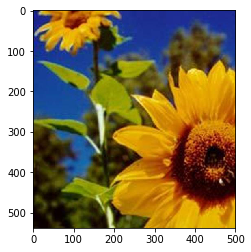

In [524]:
temp_image_name = 'image_0770.jpg'    #458 453 012 770 430
comparison_image = image_to_vector(temp_image_name)
show_image(temp_image_name)

In [525]:
# make a list of euclidian search scores against the image I am checking
search_scores = []

for feat in features:
    score = np.linalg.norm(feat-comparison_image)
    #score = 1 - distance.cosine(comparison_image, feat)
    search_scores.append(score)
    #print(score)
    
lowest = sorted(search_scores, key=float, reverse=False)
lowest[1]

118.06496

image_0741.jpg
740
118.065


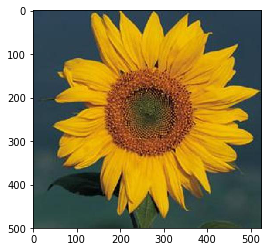

In [526]:
search_index = search_scores.index(lowest[1])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[1])

In [527]:
#search_scores[:10]

image_0749.jpg
748
119.213


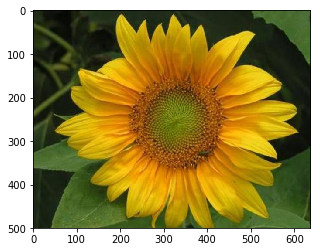

In [528]:
search_index = search_scores.index(lowest[2])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[2])

image_0020.jpg
19
126.25


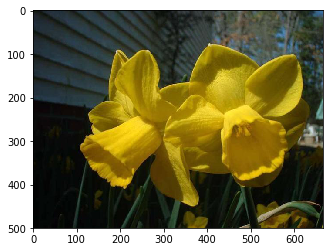

In [529]:
search_index = search_scores.index(lowest[3])
print(file_names[search_index])
show_image(file_names[search_index])
print(search_index)
print(lowest[3])

In [499]:
test = sorted(search_scores, key=float, reverse=False)

In [500]:
test

[0.0,
 118.06496,
 119.21281,
 126.2498,
 136.04848,
 137.75978,
 144.19652,
 144.2943,
 144.91394,
 146.70483,
 147.36992,
 148.47346,
 150.63208,
 155.49741,
 156.08374,
 157.84485,
 158.31439,
 158.53468,
 158.89607,
 159.35818,
 160.07007,
 160.47301,
 160.81728,
 160.96747,
 163.10091,
 166.26608,
 166.63574,
 166.69415,
 168.46454,
 168.90715,
 170.04115,
 170.95357,
 171.4117,
 171.61055,
 171.67749,
 171.80719,
 171.82291,
 173.6234,
 173.79556,
 175.41565,
 175.45692,
 176.55605,
 176.84706,
 177.05124,
 177.5681,
 178.17171,
 178.28825,
 178.62766,
 178.63757,
 179.18001,
 179.59694,
 179.84929,
 180.83694,
 183.0069,
 183.27644,
 183.77348,
 183.93367,
 183.95123,
 184.00798,
 184.62802,
 184.66658,
 184.67215,
 184.68538,
 186.27519,
 187.10501,
 187.22575,
 187.57858,
 187.88261,
 187.90294,
 188.11865,
 188.16051,
 188.82022,
 189.00009,
 190.4183,
 191.5932,
 192.22412,
 192.97089,
 193.21298,
 193.32217,
 193.54596,
 194.31238,
 194.36868,
 194.72221,
 195.22946,
 195.2

In [174]:
search_scores.index(test[1])

1

In [175]:
file_names[search_scores.index(test[1])]

'cat.1.jpg'

In [177]:
cat = file_names[search_scores.index(min(test))]
cat

'cat.0.jpg'

In [173]:
a = np.array([90,10,30,40,80,70,20,50,60,0,4,2])
np.partition(a, 2)[2]


4

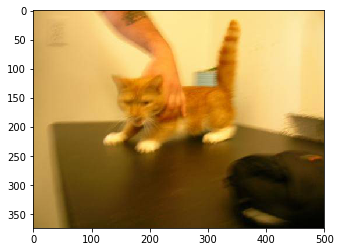

In [178]:

show_image(cat)